# Required Librabries

In [5]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz
import pandas as pd

# Import Dataset

In [6]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Preprocessing

In [8]:
# check missing value
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# check data inconsistency
non_numerical_data = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in non_numerical_data:
    print(col, ": \n\n", data[col].unique())

Sex : 

 ['M' 'F']
ChestPainType : 

 ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : 

 ['Normal' 'ST' 'LVH']
ExerciseAngina : 

 ['N' 'Y']
ST_Slope : 

 ['Up' 'Flat' 'Down']


In [10]:
# check duplicates
data.duplicated().sum()

0

In [11]:
encoder = LabelEncoder()
new_data = data.copy()
for col in non_numerical_data:
    new_data[col] = encoder.fit_transform(data[col])
new_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [12]:
X = new_data.drop(labels = ['HeartDisease'], axis = 1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [13]:
y = new_data['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

# Split for Training and Testing

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print('Train Size: \n', x_train.shape)
print('Test Size: \n', x_test.shape)

Train Size: 
 (642, 11)
Test Size: 
 (276, 11)


# Model - Decision Tree(Information Gain)

In [45]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
model = dtc.fit(x_train, y_train)

In [46]:
prediction = dtc.predict(x_test)
print('Accuracy: ', metrics.accuracy_score(y_test, prediction))

Accuracy:  0.8405797101449275


# **Kazanç Oranı (Gain Ratio) nedir açıklayınız**

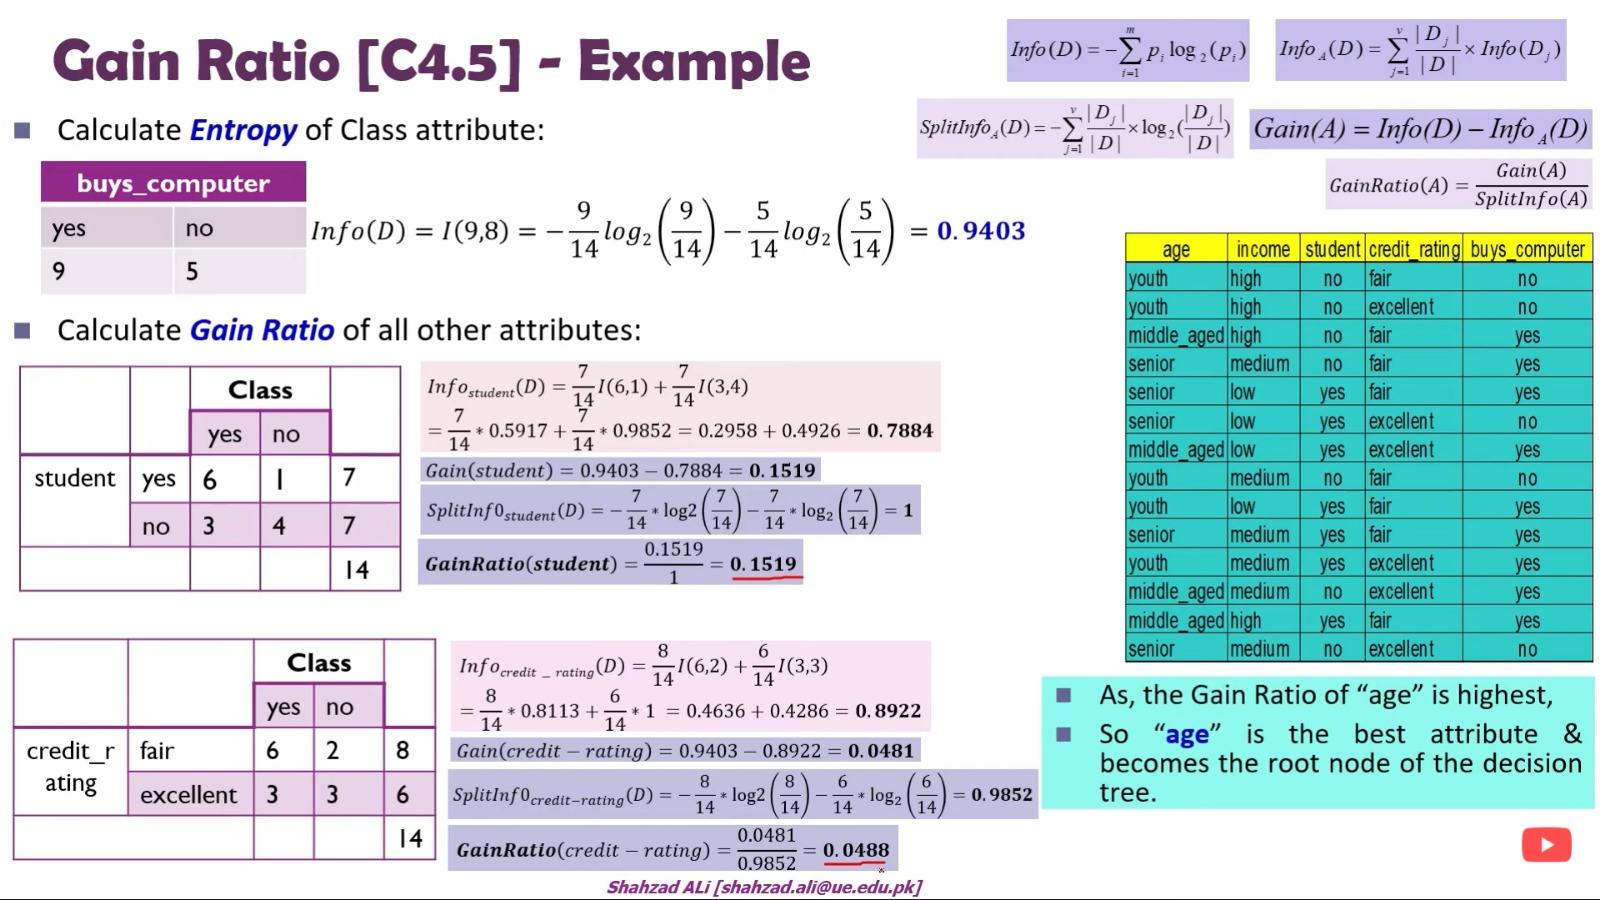

**Gain Ratio **


**Gain Ratio is modification of information gain that reduces its bias. Gain ratio overcomes the problem with information gain by taking into account the number of branches that would result before making the split.It corrects information gain by taking the intrinsic information of a split into account**

In [36]:
from scipy.stats import entropy
import pandas as pd
def information_gain(members, split):
    '''
    Measures the reduction in entropy after the split  
    :param v: Pandas Series of the members
    :param split:
    :return:
    '''
    entropy_before = entropy(members.value_counts(normalize=True))
    split.name = 'split'
    members.name = 'members'
    grouped_distrib = members.groupby(split) \
                        .value_counts(normalize=True) \
                        .reset_index(name='count') \
                        .pivot_table(index='split', columns='members', values='count').fillna(0) 
    entropy_after = entropy(grouped_distrib, axis=1)
    entropy_after *= split.value_counts(sort=False, normalize=True)
    return entropy_before - entropy_after.sum()

members = pd.Series(data.head(11)['ST_Slope'])
split = pd.Series(data.head(11)['HeartDisease'])
print(information_gain(members, split))

0.5859526183035508


In [37]:
#for example we take first 10 rows 
data.head(11)[['ST_Slope','Sex','ChestPainType','HeartDisease']].T
# we take 'ST_Slope' column : split information is 0.8812908992 
Gain Ratio ratio is (0.5859526183035508)/ (0.8812908992) = 0.6648799151738146

,0,1,2,3,4,5,6,7,8,9,10
ST_Slope,Up,Flat,Up,Flat,Up,Up,Up,Up,Flat,Up,Up
Sex,M,F,M,F,M,M,F,M,M,F,F
ChestPainType,ATA,NAP,ATA,ASY,NAP,NAP,ATA,ATA,ASY,ATA,NAP
HeartDisease,0,1,0,1,0,0,0,0,1,0,0


### Gerçekleştirdiğiniz sınıflama işleminde Doğruluk, Kesinlik, Duyarlılık, Özgüllük, Karmaşıklık Matrisi (Confusion Matrix) değerlerini hesaplayınız ve bu kavramların ne olduğunu açıklayınız.

#### Doğruluk (ACC) =Σ Gerçek pozitif + Σ Gerçek negatif/Population Toplam nüfus
#### Duyarlılık (Sensitivity): İngilizcesi sensitivity olan duyarlılık kimi zaman gerçek pozitif oranı (true pozitive rate) olarak da adlandırılır.
#### Özgüllük (Specificity) : İngilizcesi specificity olan özgüllük kimi zaman gerçek negatif oranı (true negative rate) olarak da adlandırılır. 
#### Kesinlik (precision) , sınıfı 1 olarak tahminlenmiş True Pozitif örnek sayısının, sınıfı 1 olarak tahminlenmiş tüm örnek sayısına oranıdır

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score ,classification_report

from sklearn.metrics import precision_score, recall_score, f1_score

def eval_confusion(y_pred, y_true=y_train):
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {'matrix': conf_matrix, 'precision': precision, 'recall': recall, 'f1': f1}

In [55]:
eval_confusion(y_test, prediction)

{'matrix': array([[ 93,  24],
        [ 20, 139]], dtype=int64),
 'precision': 0.852760736196319,
 'recall': 0.8742138364779874,
 'f1': 0.8633540372670807}

[[ 93  20]
 [ 24 139]]
0.8405797101449275
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       113
           1       0.87      0.85      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



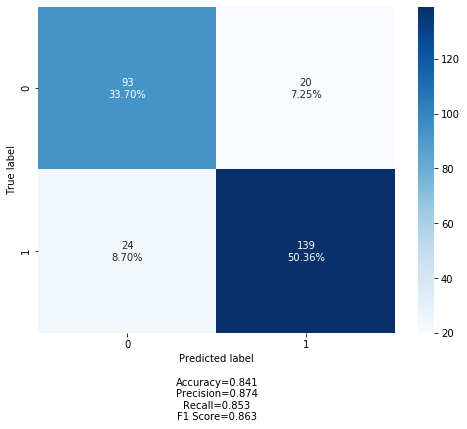

In [58]:
cm = confusion_matrix(y_test, prediction)
print(cm)
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
make_confusion_matrix(cm, figsize=(8,6))

# Visualize Tree

In [59]:
metrics.confusion_matrix(y_test, prediction)

array([[ 93,  20],
       [ 24, 139]], dtype=int64)

In [18]:
dot_data = tree.export_graphviz(dtc,filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)